In [5]:
import numpy as np
import matplotlib.pyplot as plt

class RK_Orbit_Integrator:

    def __init__(self, pos, vel, stepCount):
        self.posArr = np.zeros((stepCount, 3))
        self.velArr = np.zeros((stepCount, 3))
        self.posArr[0] = pos
        self.velArr[0] = vel
        self.index = 1
        self.stepCount = stepCount
        self.time = 0 # s since start
        self.dt = 1 # s
        self.period = np.zeros(0) # s

        self.mu = 3.986004418e14
        self.Re = 6378.138e3
        self.J2 = 1.08262668e-3

    def __magnitude(self, vec):
        return np.sqrt(sum(comp**2 for comp in vec))

    # Code source: Sam Califf
    def orbit_derivative_J2(self, phaseSpace):
        pos = phaseSpace[0]
        r = self.__magnitude(pos)

        vel = phaseSpace[1]
        pos_dot = vel

        x = pos[0]
        y = pos[1]
        z = pos[2]

        xdd = -self.mu*x/r**3*(1+3/2*self.J2*(self.Re/r)**2*(1-5*z**2/r**2))
        ydd = -self.mu*y/r**3*(1+3/2*self.J2*(self.Re/r)**2*(1-5*z**2/r**2))
        zdd = -self.mu*z/r**3*(1+3/2*self.J2*(self.Re/r)**2*(3-5*z**2/r**2))
        vel_dot = [xdd, ydd, zdd] 

        return np.array([pos_dot, vel_dot])
    
    # Code source: Sam Califf
    def runge_kutta_4(self, pos, vel):
        phaseSpace0 = np.array([pos, vel])

        k1 = self.orbit_derivative_J2(phaseSpace0)
        k2 = self.orbit_derivative_J2(phaseSpace0+self.dt*k1/2)
        k3 = self.orbit_derivative_J2(phaseSpace0+self.dt*k2/2)
        k4 = self.orbit_derivative_J2(phaseSpace0+self.dt*k3)

        return phaseSpace0 + self.dt/6*(k1+2*k2+2*k3+k4)

    def step(self):
        phaseSpace = self.runge_kutta_4(self.posArr[self.index-1], self.velArr[self.index-1])
        self.posArr[self.index] = phaseSpace[0]
        self.velArr[self.index] = phaseSpace[1]

        if not self.posArr[self.index-1][2] > 0 and self.posArr[self.index][2] > 0:
            self.period = np.append(self.period, self.time)
        
        self.time += self.dt
        self.index += 1

    def run(self):
        while(self.index < self.stepCount):
            self.step()
    
    def getPeriod(self):
        if len(self.period) >= 2:
            return self.period[1]-self.period[0]
        else:
            return 0

    def plot(self, axis):
        axis.plot(self.posArr[:, 0], self.posArr[:, 1], self.posArr[:, 2])

In [9]:
spaceShip = RK_Orbit_Integrator([(6378+500)*1000, 0, 0], [0, 4949, 4949], 50*3600)


spaceShip.run()

Period: 1.2666666666666666 hrs


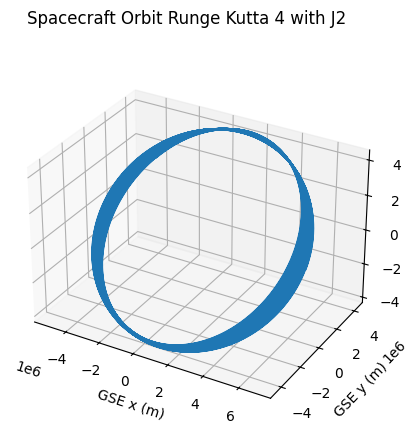

In [10]:
fig = plt.figure()
fig.suptitle('Spacecraft Orbit Runge Kutta 4 with J2')
axis = fig.add_subplot(projection='3d')
spaceShip.plot(axis)
axis.set_aspect('equal')
axis.set(xlabel = "GSE x (m)", ylabel = "GSE y (m)", zlabel = "GSE z (m)")

print("Period: "+(str(round(spaceShip.getPeriod()/3600, 20)) +" hrs" if spaceShip.getPeriod() != 0 else '**Not enough data. Must pass equator 3 times**'))